In [1]:
import numpy as np
import galois
import matplotlib.pyplot as plt
from naive_DPF import NaiveDPF 

## Point Function
A [Distributed Point Function](https://en.wikipedia.org/wiki/Distributed_point_function) is a point function similar to a [delta function](https://en.wikipedia.org/wiki/Kronecker_delta) except the output can be equal to any value at the point. A point function is defined for all $x' \neq x$ as:

$$P_{x,y}(x) = y$$
$$P_{x,y}(x') = 0$$

Below is a simple example of a point function, where there is a single point when $x = 4$. The value of the point function is $y = 1$.

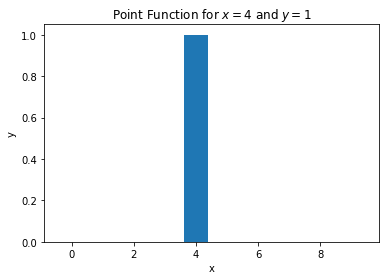

In [2]:
x = 4
y = 1

# Define the PF
P = np.zeros(10)
P[x] = y

# Plot the point function
plt.title("Point Function for $x=4$ and $y=1$")
plt.xlabel("x")
plt.ylabel("y")
plt.bar(np.arange(10), P)
plt.show()

## 2 Party DPF: Single Bit

This example highlights that for a single bit point function the keys be identical apart from a single bit. This is so that when the keys are added together the result is the point function. The code below highlights how the single bit that is different hides the point function.

In [3]:
DPF = NaiveDPF(galois.GF2, num_outputs=10)

# Generate function with the following parameters:
x = 4
y = galois.GF2(1)

# Generate the secret keys
sk_0, sk_1 = DPF.gen_keys(x, y)
print("Secret Key 0:     ", sk_0)
print("Secret Key 1:     ", sk_1)
print("Added Secret Keys:", sk_0 + sk_1)
print("Observe how the secret keys additively cancel for all x != 4")
print("This allows us to hide the point function from each evaluator")


# Evaluate the secret keys at x
print("\nEvaluating Secret Key 0 at x=4 is:", DPF.eval_key(sk_0, 4))
print("Evaluating Secret Key 1 at x=4 is:", DPF.eval_key(sk_1, 4))
print(f"Therefore, \n(Secret Key 0) + (Secret Key 1) = {DPF.eval_key(sk_0, x) + DPF.eval_key(sk_1, x)} = y")

Secret Key 0:      [1 0 0 0 1 1 0 0 0 1]
Secret Key 1:      [1 0 0 0 0 1 0 0 0 1]
Added Secret Keys: [0 0 0 0 1 0 0 0 0 0]
Observe how the secret keys additively cancel for all x != 4
This allows us to hide the point function from each evaluator

Evaluating Secret Key 0 at x=4 is: 1
Evaluating Secret Key 1 at x=4 is: 0
Therefore, 
(Secret Key 0) + (Secret Key 1) = 1 = y
